## Main source: https://zerowasteeurope.eu/wp-content/uploads/2020/12/zwe_reloop_report_reusable-vs-single-use-packaging-a-review-of-environmental-impact_en.pdf.pdf_v2.pdf

**Initial question** (Jeyana): If I use washable plastic containers and bags when shopping (instead of single-use plastics), does it actually help to reduce my impact?<br>
**Short answer**: Yes, if you wash them at least 15 times before throwing them away. You'll use more water, but reduce CO2 emissions and the amount of waste (especially if your containers/bags are recyclable and will actually be recycled at the end of use). If possible, go for either 100% cotton or 100% polyester bags. Blended fibers can be recycled, but the process is much more complicated than for single fibre products (https://www.sciencedirect.com/science/article/pii/S0956053X19305100). Read more to examine common scenarios of plastic usage.

# Exploring Eurostat "Recycling rate of packaging waste"

https://ec.europa.eu/eurostat/web/circular-economy/indicators/main-tables <br>
Waste management -> Recycling rate of packaging waste by type of packaging (cei_wm020)

..\data\recycling_of_packaging_waste\cei_vm020.tsv

W1501 - all packaging<br>
W150101 - paper and cardboard packaging<br>
W150102 - plastic packaging<br>
W150103 - wood packaging<br>
W150104 - metallic packaging<br>
W150107 - glass packaging

The EU target for 2025 is 65% of all packaging waste recycled.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
recycling = pd.read_csv("../../data/recycling_of_packaging_waste/cei_wm020.tsv", sep='\t')
recycling.head(5)

,"waste,unit,geo\time",2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"W1501,RT,AT",69.4,64.3,65.9,64.2,66.2,66.9,68.4,67.2,67.9,...,66.6,65.8,65.9,66.6,66.6,67.1,66.8,65.6,65.5,65.4
1,"W1501,RT,BE",62.5,71.3,70.2,73.9,76.4,76.8,79,80.4,78.9,...,79.8,80.2,80.3,78.7,81.3,81.5,81.9,83.8,85.3,84.2
2,"W1501,RT,BG",:,:,:,:,:,30.8,35,54.8,50.3,...,61.6,65.1,66.5,65.7,62,64.1,63.8,65.6,60.4,:
3,"W1501,RT,CY",:,:,:,:,22,11.1,25.2,25.7,34 e,...,50,52,55.3 e,56.6,58.7,59.8,64.6,66.2,70.2,66.8
4,"W1501,RT,CZ",:,:,:,51.4,55.7,59,63.4,65.9,67.1,...,70,69.7,69.9,69.9,73,74.3,75.3,73.7,69.6,71.2


In [3]:
recycling.dtypes

waste,unit,geo\time     object
2000                    object
2001                    object
2002                    object
2003                    object
2004                    object
2005                    object
2006                    object
2007                    object
2008                    object
2009                    object
2010                    object
2011                    object
2012                    object
2013                    object
2014                    object
2015                   float64
2016                    object
2017                    object
2018                    object
2019                    object
dtype: object

In [4]:
# getting rid of extra spaces in column names
recycling.rename(str.strip, axis='columns', inplace=True)
recycling.columns

Index(['waste,unit,geo\time', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [5]:
# converting 'object' into 'float' to prepare for graph creation

for i in recycling.columns:
    if i==recycling.columns[0] or i==recycling.columns[16]:
        continue
        
    # getting rid of flags, see the bottom of https://ec.europa.eu/eurostat/databrowser/view/cei_wm020/default/table?lang=en
    recycling[i] = recycling[i].str.strip().str.replace(' b', '').str.replace(' e', '').str.replace('e', '').str.replace(' s', '').str.replace(' be', '').str.replace(' p', '').str.replace(':', 'NaN').astype(float)
    
recycling.dtypes

waste,unit,geo\time     object
2000                   float64
2001                   float64
2002                   float64
2003                   float64
2004                   float64
2005                   float64
2006                   float64
2007                   float64
2008                   float64
2009                   float64
2010                   float64
2011                   float64
2012                   float64
2013                   float64
2014                   float64
2015                   float64
2016                   float64
2017                   float64
2018                   float64
2019                   float64
dtype: object

In [6]:
recycling.head(5)

,"waste,unit,geo\time",2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"W1501,RT,AT",69.4,64.3,65.9,64.2,66.2,66.9,68.4,67.2,67.9,...,66.6,65.8,65.9,66.6,66.6,67.1,66.8,65.6,65.5,65.4
1,"W1501,RT,BE",62.5,71.3,70.2,73.9,76.4,76.8,79.0,80.4,78.9,...,79.8,80.2,80.3,78.7,81.3,81.5,81.9,83.8,85.3,84.2
2,"W1501,RT,BG",NaN,NaN,NaN,NaN,NaN,30.8,35.0,54.8,50.3,...,61.6,65.1,66.5,65.7,62.0,64.1,63.8,65.6,60.4,NaN
3,"W1501,RT,CY",NaN,NaN,NaN,NaN,22.0,11.1,25.2,25.7,34.0,...,50.0,52.0,55.3,56.6,58.7,59.8,64.6,66.2,70.2,66.8
4,"W1501,RT,CZ",NaN,NaN,NaN,51.4,55.7,59.0,63.4,65.9,67.1,...,70.0,69.7,69.9,69.9,73.0,74.3,75.3,73.7,69.6,71.2


<AxesSubplot:>

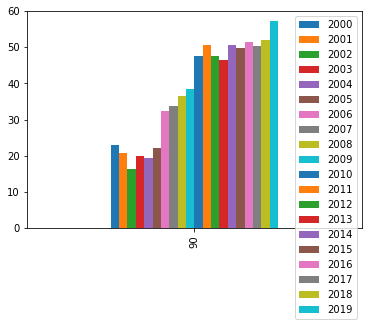

In [7]:
# Plot plastic packaging (W150102) recycling rate for NL, all time
# Needed row: recycling[recycling['waste,unit,geo\\time'] == 'W150102,RT,NL']

# fig, ax = plt.subplots()
# ax.plot(recycling[recycling['waste,unit,geo\\time'] == 'W150102,RT,NL'], color = 'cyan')
# plt.show()

recycling[recycling['waste,unit,geo\\time'] == 'W150102,RT,NL'].plot(kind='bar')

In [8]:
row = recycling[recycling['waste,unit,geo\\time'] == 'W150102,RT,NL']
row = row.drop('waste,unit,geo\\time', axis=1)
row

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
90,22.9,20.8,16.4,19.9,19.3,22.1,32.5,33.7,36.4,38.4,47.6,50.7,47.7,46.6,50.6,49.8,51.5,50.4,52.0,57.2


In [9]:
recycling.to_csv('../clean_data/cei_wm020_clean.tsv', sep='\t', index=False)

In [10]:
recycling = pd.read_csv('../clean_data/cei_wm020_clean.tsv', sep='\t')
recycling.tail()

,"waste,unit,geo\time",2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
193,"W150107,RT,RO",NaN,NaN,NaN,NaN,NaN,10.2,7.5,16.6,34.7,...,56.8,60.0,66.3,49.2,54.2,41.1,64.1,63.0,61.1,NaN
194,"W150107,RT,SE",86.1,84.0,87.6,91.6,103.6,95.3,91.4,94.5,93.5,...,92.9,91.9,88.2,89.0,94.7,93.6,92.8,93.0,92.7,93.1
195,"W150107,RT,SI",NaN,NaN,NaN,NaN,17.9,40.6,38.1,41.8,79.8,...,75.1,82.3,87.3,85.9,99.3,98.5,100.2,98.5,104.0,99.5
196,"W150107,RT,SK",NaN,NaN,NaN,26.5,26.5,50.1,14.6,55.0,47.6,...,55.7,63.9,69.4,72.9,67.7,66.2,62.2,68.7,68.6,69.7
197,"W150107,RT,UK",38.6,34.8,34.1,37.5,43.7,52.5,51.4,55.2,61.3,...,60.7,63.9,67.8,68.3,67.2,65.7,66.9,67.6,68.5,NaN


In [11]:
# Plot plastic packaging (W150102) recycling rate for NL, all time
# Needed row: recycling[recycling['waste,unit,geo\\time'] == 'W150102,RT,NL']

nl_plastic_row = recycling[recycling['waste,unit,geo\\time'] == 'W150102,RT,NL']
nl_plastic_row = nl_plastic_row.drop('waste,unit,geo\\time', axis=1)

nl_plastic = nl_plastic_row.squeeze()
nl_plastic

2000    22.9
2001    20.8
2002    16.4
2003    19.9
2004    19.3
2005    22.1
2006    32.5
2007    33.7
2008    36.4
2009    38.4
2010    47.6
2011    50.7
2012    47.7
2013    46.6
2014    50.6
2015    49.8
2016    51.5
2017    50.4
2018    52.0
2019    57.2
Name: 90, dtype: float64

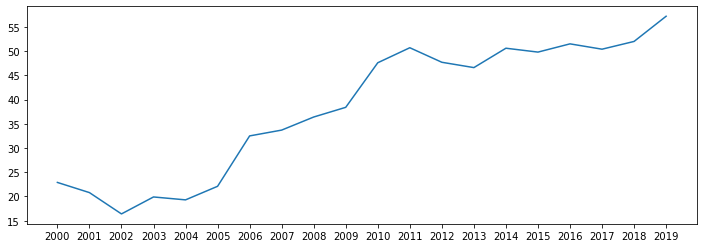

In [12]:
#nl_plastic.plot()

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(nl_plastic)